In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
import os
os.environ['KAGGLE_USERNAME'] = 'saikoushikkalakota'
os.environ['KAGGLE_KEY'] = '916dc3b0923ae538106de8d6fdd6e1fe'

In [3]:
! kaggle datasets download -d prithwirajmitra/covid-face-mask-detection-dataset

 97% 201M/207M [00:14<00:00, 8.27MB/s]
100% 207M/207M [00:14<00:00, 15.0MB/s]


In [ ]:
! unzip covid-face-mask-detection-dataset.zip

In [5]:
main_dir = '/content/New Masks Dataset'
train_dir = os.path.join(main_dir,'Train')
test_dir = os.path.join(main_dir,'Test')
valid_dir = os.path.join(main_dir,'Validation')

train_mask_dir = os.path.join(train_dir,'Mask')
train_No_mask_dir = os.path.join(train_dir,'Non Mask')

In [6]:
train_mask_names = os.listdir(train_mask_dir)
print(train_mask_names[0:10])

['0748.jpg', '0043.jpg', '1117.jpg', '0761.jpg', '1278.jpg', '1053.jpg', '0802.jpg', '0267.jpg', '0451.jpg', '0498.jpg']


In [7]:
train_No_mask_names = os.listdir(train_No_mask_dir)
print(train_No_mask_names[0:10])

['243.jpg', '64.jpg', '47.jpg', '74.jpg', '249.jpg', '66.jpg', '135.jpg', '52.jpg', '294.jpg', '111.jpg']


In [8]:
mask_images = []

for i in train_mask_names:
  mask_images.append(os.path.join(train_mask_dir,i))

non_mask_images=[]

for i in train_No_mask_names:
  non_mask_images.append(os.path.join(train_No_mask_dir,i))

In [9]:
import plotly.express as px
from skimage import io
from skimage.transform import resize

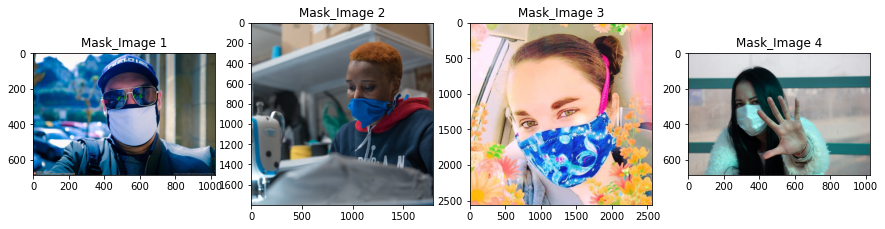

In [10]:
fig,ax = plt.subplots(1,4,figsize=(15,5))
img1 = io.imread(mask_images[0])
img2 = io.imread(mask_images[1])
img3 = io.imread(mask_images[2])
img4 = io.imread(mask_images[3])

ax[0].imshow(img1)
ax[0].set_title("Mask_Image 1")

ax[1].imshow(img2)
ax[1].set_title("Mask_Image 2")

ax[2].imshow(img3)
ax[2].set_title("Mask_Image 3")

ax[3].imshow(img4)
ax[3].set_title("Mask_Image 4")


plt.show()


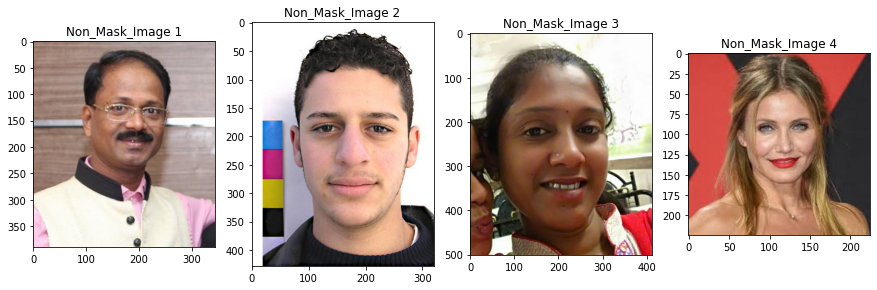

In [11]:
fig,ax = plt.subplots(1,4,figsize=(15,5))
img1 = io.imread(non_mask_images[0])
img2 = io.imread(non_mask_images[1])
img3 = io.imread(non_mask_images[2])
img4 = io.imread(non_mask_images[3])

ax[0].imshow(img1)
ax[0].set_title("Non_Mask_Image 1")

ax[1].imshow(img2)
ax[1].set_title("Non_Mask_Image 2")

ax[2].imshow(img3)
ax[2].set_title("Non_Mask_Image 3")

ax[3].imshow(img4)
ax[3].set_title("Non_Mask_Image 4")


plt.show()


In [12]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.2,
                                   rotation_range=25,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(300,300),
                                                    batch_size=32,
                                                    class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(300,300),
                                                  batch_size=32,
                                                  class_mode='binary')
valid_generator = valid_datagen.flow_from_directory(valid_dir,
                                                    target_size=(300,300),
                                                    batch_size=32,
                                                    class_mode='binary')

Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [13]:
train_generator.class_indices

{'Mask': 0, 'Non Mask': 1}

In [14]:
train_generator.image_shape

(300, 300, 3)

In [15]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',input_shape=(300,300,3),activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.5))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.5))

model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256,activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 300, 300, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 150, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 32)        1

In [17]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=4)

In [18]:
model_train = model.fit(train_generator,epochs=25,
          validation_data=valid_generator,
          batch_size=32)

Epoch 1/25
19/19 [==============================] - 22s 1s/step - loss: 0.8855 - accuracy: 0.5417 - val_loss: 0.6839 - val_accuracy: 0.5882
Epoch 2/25
19/19 [==============================] - 22s 1s/step - loss: 0.6428 - accuracy: 0.6033 - val_loss: 0.6747 - val_accuracy: 0.6405
Epoch 3/25
19/19 [==============================] - 22s 1s/step - loss: 0.6025 - accuracy: 0.6717 - val_loss: 0.6613 - val_accuracy: 0.7026
Epoch 4/25
19/19 [==============================] - 22s 1s/step - loss: 0.5618 - accuracy: 0.7400 - val_loss: 0.6422 - val_accuracy: 0.7190
Epoch 5/25
19/19 [==============================] - 22s 1s/step - loss: 0.5266 - accuracy: 0.7450 - val_loss: 0.6210 - val_accuracy: 0.7810
Epoch 6/25
19/19 [==============================] - 21s 1s/step - loss: 0.4879 - accuracy: 0.7800 - val_loss: 0.5858 - val_accuracy: 0.8105
Epoch 7/25
19/19 [==============================] - 21s 1s/step - loss: 0.4448 - accuracy: 0.8067 - val_loss: 0.5741 - val_accuracy: 0.8105
Epoch 8/25
19/19 [==

In [19]:
import pandas as pd
metrics = pd.DataFrame(model.history.history)

In [20]:
metrics.head(10)

,loss,accuracy,val_loss,val_accuracy
0,0.885539,0.541667,0.683940,0.588235
1,0.642808,0.603333,0.674712,0.640523
2,0.602473,0.671667,0.661332,0.702614
3,0.561802,0.740000,0.642172,0.718954
4,0.526621,0.745000,0.620998,0.781046
5,0.487863,0.780000,0.585761,0.810458
6,0.444781,0.806667,0.574112,0.810458
7,0.396855,0.861667,0.540526,0.826797
8,0.368613,0.856667,0.513912,0.839869
9,0.348691,0.873333,0.498349,0.830065


In [ ]:
test_loss,test_accuracy = model.evaluate_generator(test_generator)

In [26]:
print('test_loss: ',test_loss)
print('test_accuracy: ',test_accuracy)

test_loss:  0.3298496901988983
test_accuracy:  0.8600000143051147
